In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import umap.umap_ as umap
import plotly.express as px
import numpy as np

c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
d = pd.read_csv(r"doubleExposureData.csv")

In [3]:
d

,x,lap,exposure,speed,c1,c2,c3,c4,c5,c6,...,c151,c152,c153,c154,c155,c156,c157,c158,c159,c160
0,31.125376,1,1,5.251157,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30.230570,1,1,5.356319,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28.640258,1,1,6.654168,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27.674696,1,1,6.949796,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28.495599,1,1,7.668700,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3369,152.146306,50,2,29.036710,0.0,0.0,0.0,0.0,0.244201,0.298690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3370,161.514070,50,2,28.894996,0.0,0.0,0.0,0.0,0.402620,0.054489,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3371,167.168036,50,2,28.588590,0.0,0.0,0.0,0.0,0.244201,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3372,174.179060,50,2,27.265541,0.0,0.0,0.0,0.0,0.054489,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data = d.dropna()

allGoodCol = data.columns
allGoodCol = list(allGoodCol)
allGoodCol = allGoodCol[4::]

In [5]:
print("Size is ", len(allGoodCol))
print("Nb of lap of the 1st exposure is", len(data[data["exposure"] == 1]["lap"].unique()))
print("Nb of lap of the 2nd exposure is", len(data[data["exposure"] == 2]["lap"].unique()))

# We can reduce the number of laps in RUN2 to 16
# print("Cropping RUN2 to 16 laps")
# data = data[data['lap'] < len(data[data["exposure"] == 1]["lap"].unique()) + 16]
# print("Number of laps :", len(data["lap"].unique()))

# We reduce the number of lab in RUN2 to the same as in RUN1 to avoid any bias
print("Cropping RUN2 to RUN1 length")
data = data[data['lap'] < 2*len(data[data["exposure"] == 1]["lap"].unique()) + 1]

Size is  160
Nb of lap of the 1st exposure is 18
Nb of lap of the 2nd exposure is 32
Cropping RUN2 to RUN1 length


In [6]:
reducer = umap.UMAP(n_neighbors = 20, 
                    metric = 'cosine', 
                    output_metric = 'euclidean',
                    learning_rate = 1.0, 
                    init = 'spectral', 
                    min_dist = 0.1, 
                    spread = 1.0, 
                    repulsion_strength = 1.0,
                    negative_sample_rate = 5,
                    target_metric = 'categorical', 
                    dens_lambda = 2.0, 
                    dens_frac = 0.3,
                    dens_var_shift=0.1,
                    n_components = 3)

parsedData = data[allGoodCol].values

embedding = reducer.fit_transform(parsedData)
embedding.shape

(2720, 3)

In [7]:
df = pd.DataFrame(embedding, columns=['x1', 'x2', 'x3'])
df["x"] = data.x
df["lap"] = data.lap
df["speed"] = data.speed
df["exposure"] = data.exposure

In [20]:
fig = px.scatter_3d(df, x='x1', y='x2', z='x3',
              color='x', opacity=0.9)

fig.update_traces(marker_size=2)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

c:\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [9]:
fig = px.scatter_3d(df, x='x1', y='x2', z='x3',
              color='exposure', opacity=0.9, color_continuous_scale='Bluered_r')

fig.update_traces(marker_size=1.5)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

## Labeled UMAP by lap number

In [10]:
reducer_sup = umap.UMAP(n_neighbors = 20, 
                    metric = 'cosine', 
                    output_metric = 'euclidean',
                    learning_rate = 1.0, 
                    init = 'spectral', 
                    min_dist = 0.1, 
                    spread = 1.0, 
                    repulsion_strength = 1.0,
                    negative_sample_rate = 5,
                    target_metric = 'categorical', 
                    dens_lambda = 2.0, 
                    dens_frac = 0.3,
                    dens_var_shift=0.1,
                    n_components = 3)

parsedData = data[allGoodCol].values

embedding_sup = reducer_sup.fit_transform(parsedData, y = data.lap)
embedding_sup.shape

(2720, 3)

In [11]:
df2 = pd.DataFrame(embedding_sup, columns=['x1', 'x2', 'x3'])
df2["x"] = data.x
df2["lap"] = data.lap
df2["speed"] = data.speed
df2["exposure"] = data.exposure

In [12]:
# We generate a label for the data : the middle point of each lap have the lap number

global_label = ["" for i in range(0, len(df))]

for lap in df2.lap.unique():

    # We get the number of elements in the lap
    nb = len(df2[df2.lap == lap])

    # We get the index of the first point of the global df with that lap
    start = len(df2[df2.lap < lap])

    # We get the middle point
    middle = int(nb/2)

    # We get the coordinates of the middle point in the global dataframe
    middle = start + middle

    # We set the label
    global_label[middle] = str(lap)

df2["label"] = global_label

In [13]:
df2

,x1,x2,x3,x,lap,speed,exposure,label
0,13.348638,1.128424,15.561275,31.125376,1,5.251157,1,
1,13.321319,1.127039,15.557126,30.230570,1,5.356319,1,
2,13.379419,1.108659,15.590745,28.640258,1,6.654168,1,
3,13.431197,1.166707,15.631229,27.674696,1,6.949796,1,
4,13.434196,1.175828,15.634178,28.495599,1,7.668700,1,
...,...,...,...,...,...,...,...,...
2715,5.604473,0.358436,-0.514353,160.149081,36,27.308036,2,
2716,5.637227,0.288841,-0.497573,167.328367,36,26.572705,2,
2717,5.644915,0.244997,-0.511404,172.651287,36,26.622922,2,
2718,5.647294,0.236506,-0.517019,180.055394,36,25.503164,2,


In [14]:
fig = px.scatter_3d(df2, x='x1', y='x2', z='x3',
              color='lap', opacity=0.9, text = "label")

fig.update_traces(marker_size=1.5)
fig.update_traces(textfont_size=10)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

## Replay projection in there

In [15]:
# Load the replay data - MAKE SURE IT'S THE SAME ANIMAL !

dRep = pd.read_csv(r"replayData.csv")
dataRep = dRep.dropna()
allGoodColRep = dataRep.columns
allGoodColRep = list(allGoodColRep)
allGoodColRep = allGoodColRep[3::]

In [16]:
dRep

,binEdges,track,id,c1,c2,c3,c4,c5,c6,c7,...,c147,c148,c149,c150,c151,c152,c153,c154,c155,c156
0,6385.784091,1,161,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,6385.804091,1,161,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6385.824091,1,161,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,6385.844091,1,161,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,6385.864091,1,161,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,10249.704091,2,142,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
812,10249.724091,2,142,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
813,10249.744091,2,142,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
814,10249.764091,2,142,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [17]:
parsedDataRep = dataRep[allGoodCol].values
embeddingRep = reducer.transform(parsedDataRep)

embeddingRepTrial = reducer_sup.transform(parsedDataRep)


KeyError: "['c12', 'c44', 'c50', 'c52', 'c79', 'c98', 'c101', 'c109', 'c157', 'c158', 'c159', 'c160'] not in index"

In [ ]:
dfRep = pd.DataFrame(embeddingRep, columns=['x1', 'x2', 'x3'])
dfRep["t"] = dRep["binEdges"]
dfRep["order"] = dRep["order"]

dfRep2 = pd.DataFrame(embeddingRepTrial, columns=['x1', 'x2', 'x3'])
dfRep2["t"] = dRep["binEdges"]
dfRep2["order"] = dRep["order"]

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=[go.Scatter3d(x=df["x1"], y=df["x2"], z = df["x3"], mode='markers')])

fig.add_trace(go.Scatter3d(x=dfRep["x1"], y=dfRep["x2"], z=dfRep["x3"], mode='markers'))
fig.update_traces(marker_size=2)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

### We project on the trial manifold

In [ ]:
fig = go.Figure(data=[go.Scatter3d(x=df2["x1"], y=df2["x2"], z = df2["x3"], mode='markers')])

fig.add_trace(go.Scatter3d(x=dfRep2["x1"], y=dfRep2["x2"], z=dfRep2["x3"], mode='markers'))
fig.update_traces(marker_size=2)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

### We look for the events closer to the re-exposure manifold than to the exposure

In [ ]:
from scipy.spatial import distance

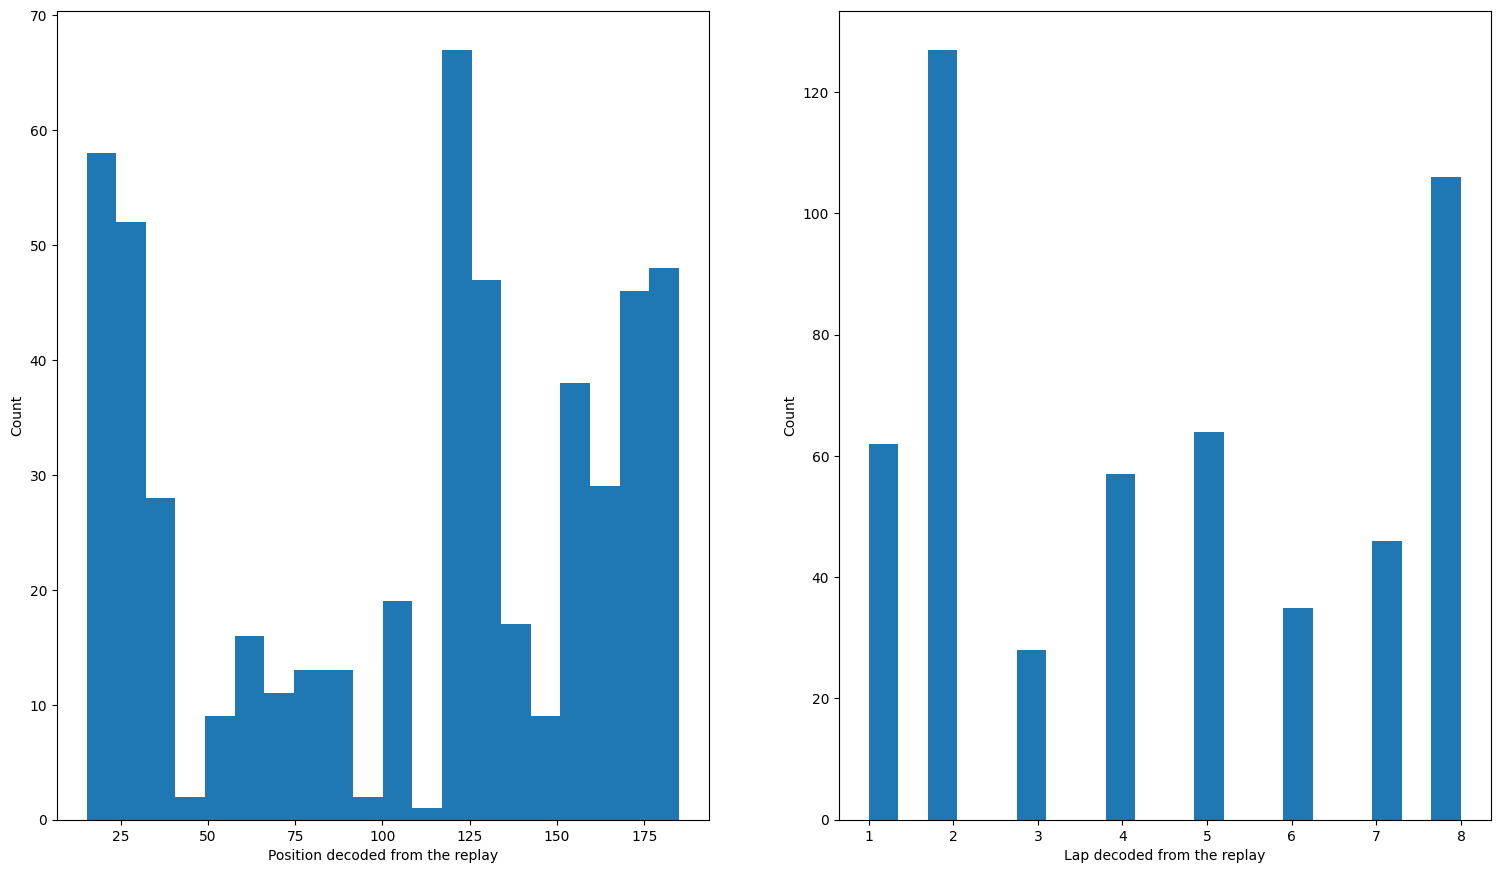

In [ ]:
# For each point in the replay, we want to find the closest point in the original data - exposure == 2

distMat = distance.cdist(embeddingRep, embedding, 'euclidean')

# We find the index of the minimum on each line
minIndex = np.argmin(distMat, axis = 1)

# Now we retrieve the position of the closest point
x = df["x"].values
x = x[minIndex]

plt.subplot(1, 2, 1)
plt.hist(x, 20)
plt.xlabel("Position decoded from the replay")
plt.ylabel("Count")


# We retrieve the lap of the closest point
exposure = df["exposure"].values
exposure = exposure[minIndex]

lap = df["lap"].values
lap = lap[minIndex]

plt.subplot(1, 2, 2)
plt.hist(lap, 20)
plt.xlabel("Lap decoded from the replay")
plt.ylabel("Count")

# Increase the width of the plot
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

Text(0, 0.5, 'Count')

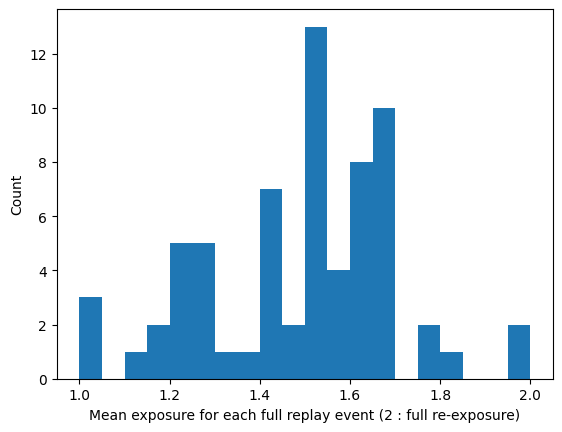

In [ ]:
# We get the quantity of replay IDs that are full exposure 2, mixed, full exposure 1

uniqueID = np.unique(dRep["id"])
allMeans = [np.mean(exposure[dRep["id"] == i]) for i in uniqueID]

plt.hist(allMeans, 20)
plt.xlabel("Mean exposure for each full replay event (2 : full re-exposure)")
plt.ylabel("Count")


### We look at the lap to lap correlation between the trajectories